In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
import random
import pingouin
import os

#plots.py
# . . .
def plot_lines(df, linewidth = 1, figsize = (40,20),
               secondary_y = None, legend=True,
               h_zero = True, pp = None, 
               save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.dropna().plot.line(linewidth = linewidth, ax = ax, secondary_y=secondary_y, legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    if h_zero: ax.axhline(0, ls="--", color = "k")
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def corr_matrix_heatmap(df, save_fig = False, pp = None):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(df, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = df.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(df.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " corrMatrix.png",
            bbox_inches = "tight")

        if pp != None: pp.savefig(fig, bbox_inches="tight")
    plt.close()

def plot_stacked_lines(df, plot_vars, linewidth = 1, 
                       figsize = (40, 20),
                       pp = None, total_var = False,
                      title = False):
    fig, ax = plt.subplots(figsize = figsize)
    # df.plot.area() created a stacked plot
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax,
                                c = "k",label = total_var, 
                                ls = "--")
    # place legend in top left corner of plot
    # format legend so that there are two columns of names
    ax.legend(loc = 2, ncol = 2)
    if title != False:
        plt.title(title)
        
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
            
    return df

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:

data_dict = {
             "PPI: All Comodities": "PPIACO",
             "PPI: Lumber and Wood Products":"WPU081",
            "PPI: Copper and Copper Products":"WPUSI019011",
            "PPI: Gas and Oil Extraction":"PCU21112111",
            "PPI: Final Demand": "PPIFIS",
            "Expected Inflation: 5 Year Breakeven Rate":"T5YIE",
            "$CPI_{Urban}$":"CPIAUCNS",
               "1 Month Treasury Rate (%)": "DGS1MO",
               "3 Month Treasury Rate (%)": "DGS3MO",               
               "1 Year Treasury Rate (%)": "DGS1",
               "2 Year Treasury Rate (%)": "DGS2",
               "10 Year Treasury Rate (%)": "DGS10",
               "30 Year Treasury Rate (%)": "DGS30",               
               "Effective Federal Funds Rate (%)": "DFF",
             
             "$CPI_{Core}$":"CPILFESL",
            "Industrial Production Index":"INDPRO",
            "$\pi_{e_{5Y}}$":"T5YIE",
             "$\pi_{e_{10Y}}$":"T10YIE",
             "Currency in Circulation":"WCURCIR",
             "M2":"WM2NS",
#             "Personal Savings Rate":"PSAVERT",
#             "Private Weekly Employee Earnings":"CES0500000011",
#             "Private Hourly Nonsupervisory Earnings":"AHETPI",
            "Unemployment Rate":"UNRATE",
            "Business Inventories":"BUSINV"}
freq = "M"
start = datetime.datetime(1990, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()

df = gather_data(data_dict, start, 
          end = end, freq = freq)

In [3]:
for key in df:
    if "Earnings" in key or "Inventories" in key:
        df["Real " + key ] = df[key].div(df["$CPI_{Core}$"])


In [4]:
keys = df.keys()
annual_rate = df.copy()
monthly_rate = df.copy()
for key in keys:
#     if "PPI" in key or "CPI" in key or "M2" in key:
    annual_rate[key ] = df[key].pct_change(12) * 100
    monthly_rate[key] = ((df[key].pct_change(1)).add(1)).pow(12).sub(1).mul(100)
annual_rate.rename(columns = {"$CPI_{Core}$":"$\pi_{Core}$",
                     "$CPI_{Urban}$":"$\pi_{Urban}$",
                    "PPI: All Comodities":"$\pi_{PPI_{Commodities}}$",
                    "PPI: Final Demand": "$\pi_{PPI_{Final Demand}}$"}, inplace = True)
monthly_rate.rename(columns = {"$CPI_{Core}$":"$\pi_{Core}$",
                     "$CPI_{Urban}$":"$\pi_{Urban}$",
                    "PPI: All Comodities":"$\pi_{PPI_{Commodities}}$",
                    "PPI: Final Demand": "$\pi_{PPI_{Final Demand}}$"}, inplace = True)

for key in keys:
    if "Rate" in key:
        annual_rate[key] = df[key]
        monthly_rate[key] = df[key]
        
diff_annual_rate = annual_rate.diff(12)

In [5]:
plt.rcParams.update({'font.size': 42})
plt.rcParams['axes.ymargin'] = .05
plt.rcParams['axes.xmargin'] = .05
def plot_scatter(df):
    for key1 in df:
        for key2 in df:
            if key1 != key2:
                for key3 in df:
                    if key1 != key3 and key2 != key3:
                        fig, ax = plt.subplots(figsize = (20,12))
                        df.plot.scatter(x = key1,
                               y = key2,
                               c = key3,
                               ax = ax,
                                       cmap = "viridis")
# plot_vars = ["$\pi_{Core}$", "Currency in Circulation", "Unemployment Rate"]
# plot_vars = ["$\pi_{Core}$", "Currency in Circulation", "Unemployment Rate", "Nominal GDP ($ Bil)"]
plot_vars = ["1 Year Treasury Rate (%)", "$\pi_{Core}$", "Currency in Circulation", "Unemployment Rate", "Nominal GDP ($ Bil)"]

# plot_data = diff_annual_rate[plot_vars].dropna()
# plot_scatter(plot_data)
# plot_data.pcorr()

In [6]:
# set default fontsize for text in plot
plt.rcParams.update({'font.size': 42})
plt.rcParams['axes.ymargin'] = .05
plt.rcParams['axes.xmargin'] = .05
plot_keys = ["PPI: Lumber and Wood Products",
             "PPI: Copper and Copper Products",
             "PPI: Gas and Oil Extraction"]
plot_df = annual_rate[plot_keys]
plot_df

,PPI: Lumber and Wood Products,PPI: Copper and Copper Products,PPI: Gas and Oil Extraction
DATE,,,
1990-01-31,NaN,NaN,NaN
1990-02-28,NaN,NaN,NaN
1990-03-31,NaN,NaN,NaN
1990-04-30,NaN,NaN,NaN
1990-05-31,NaN,NaN,NaN
...,...,...,...
2023-05-31,-33.776735,-7.223873,-48.466185
2023-06-30,-19.093418,-5.520740,-54.994719
2023-07-31,-17.458831,6.417524,-39.979416


C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\2410257932.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


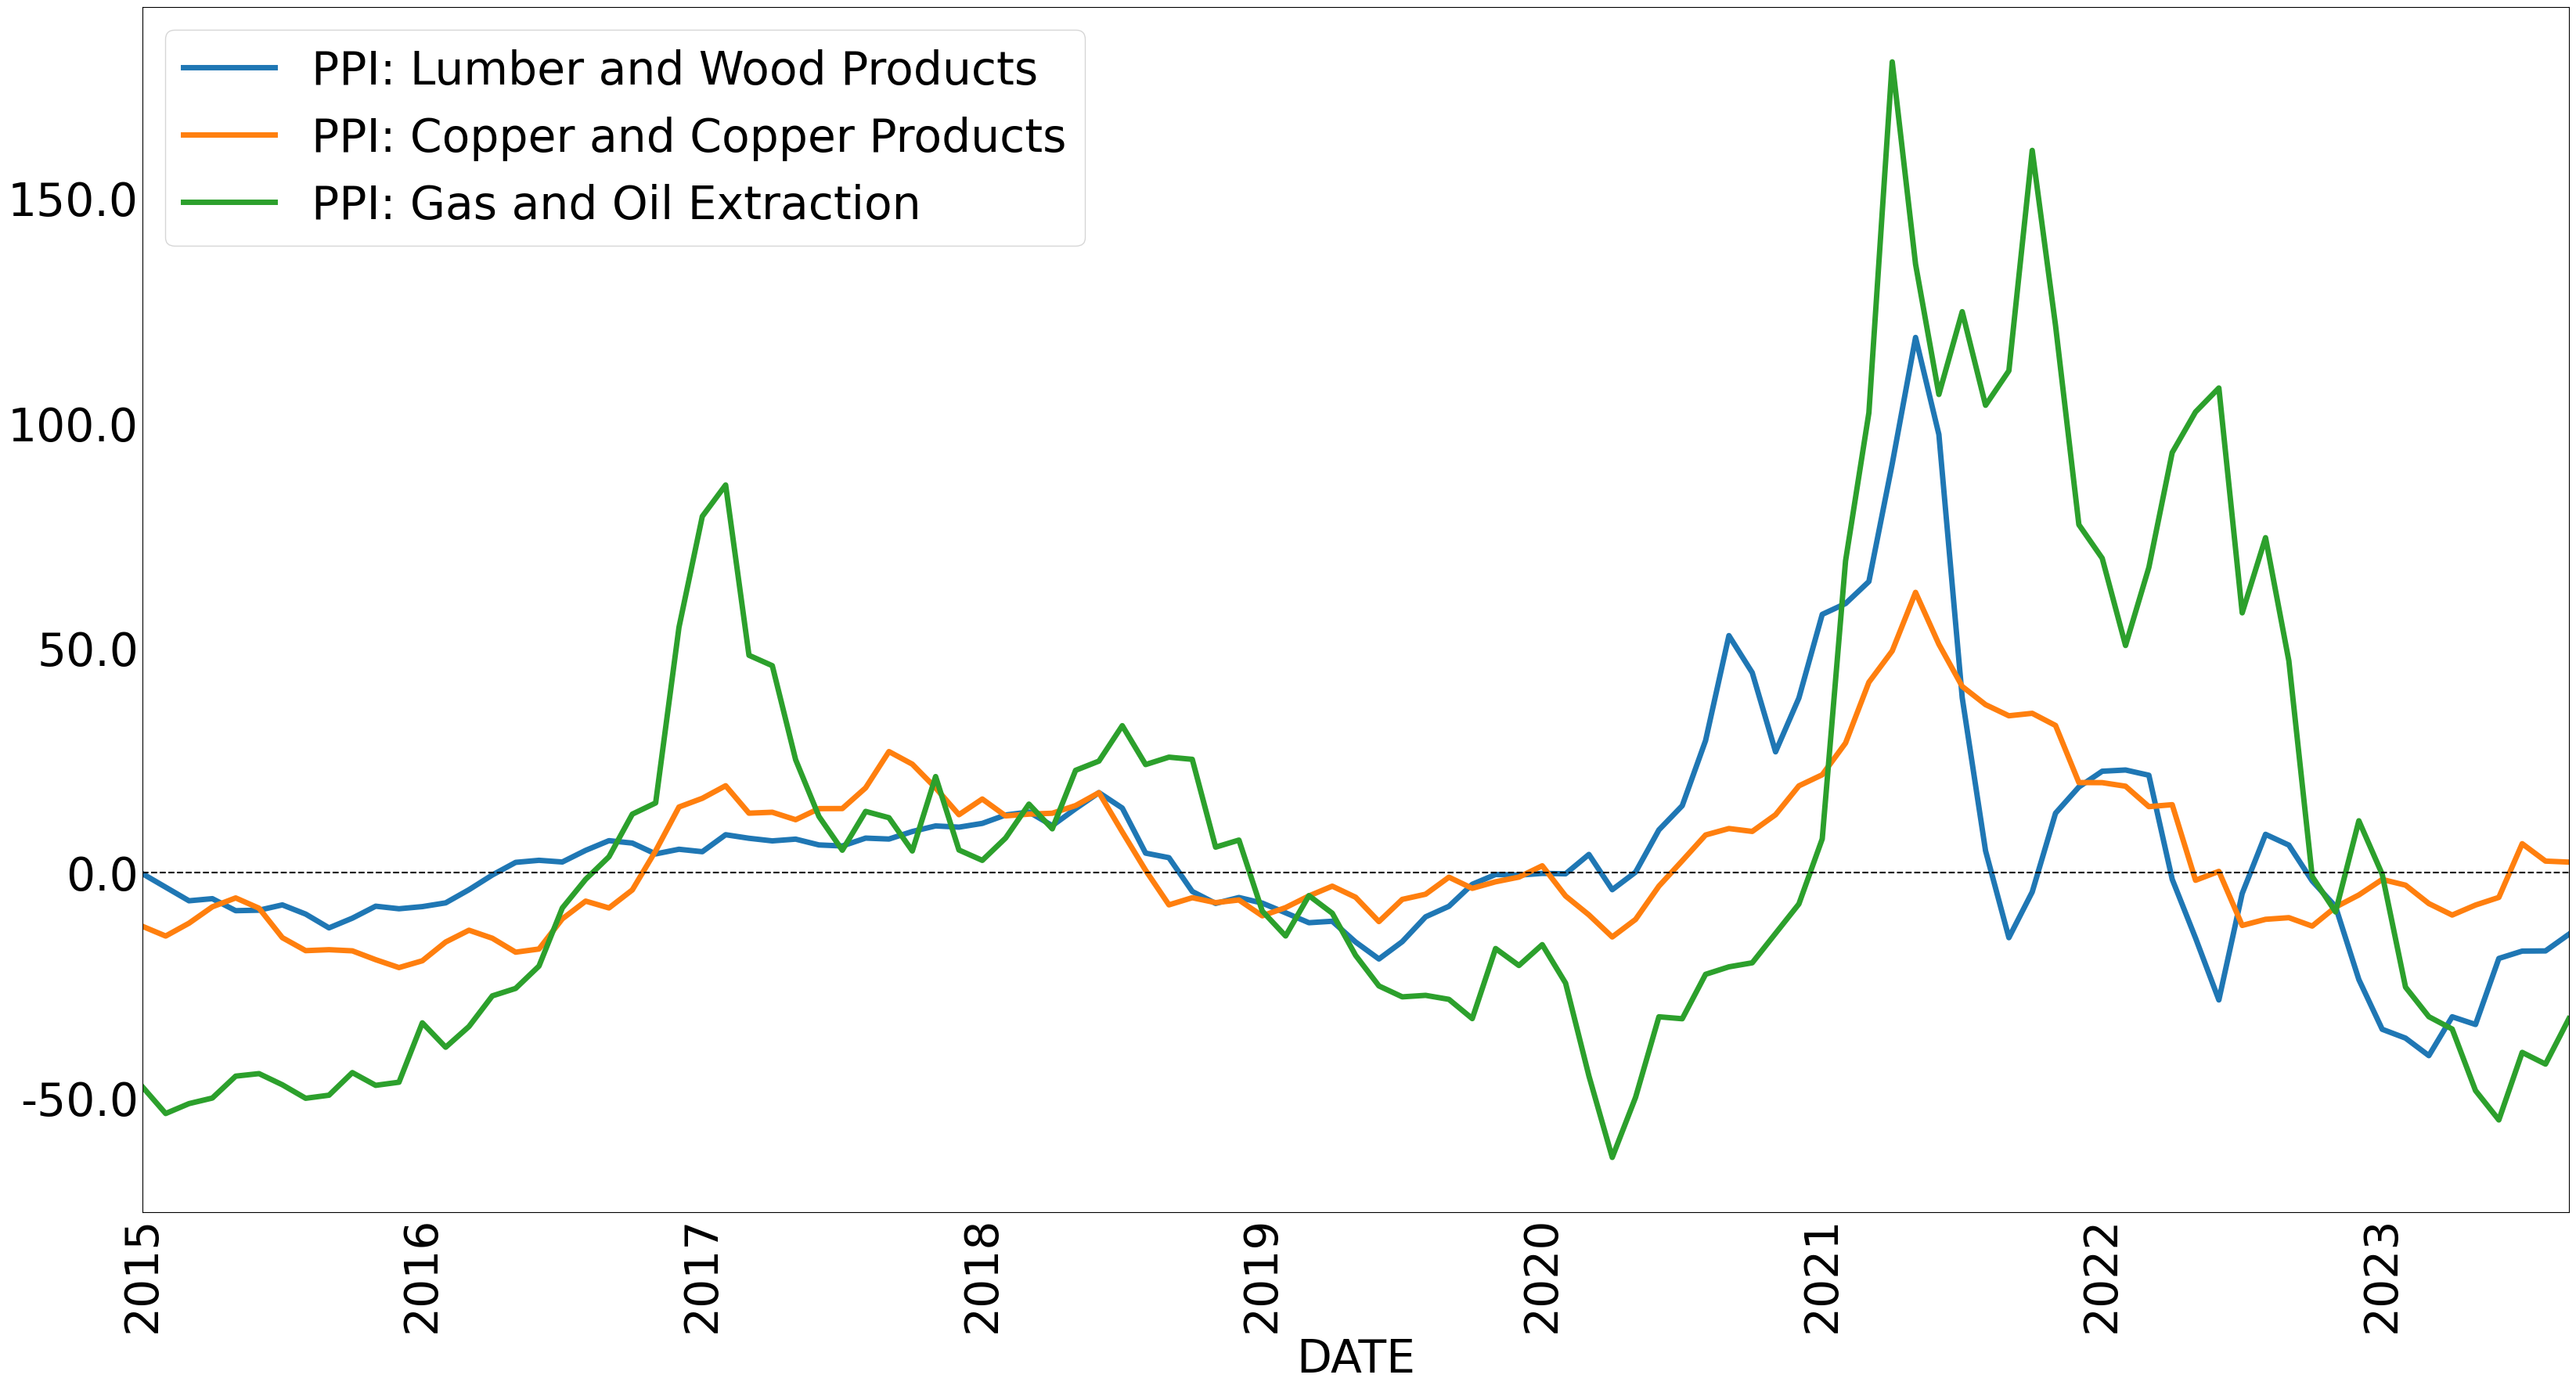

In [7]:
plot_lines(plot_df.loc["2015":], linewidth = 5)
plot_df.to_csv("PPIData.csv")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\2410257932.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


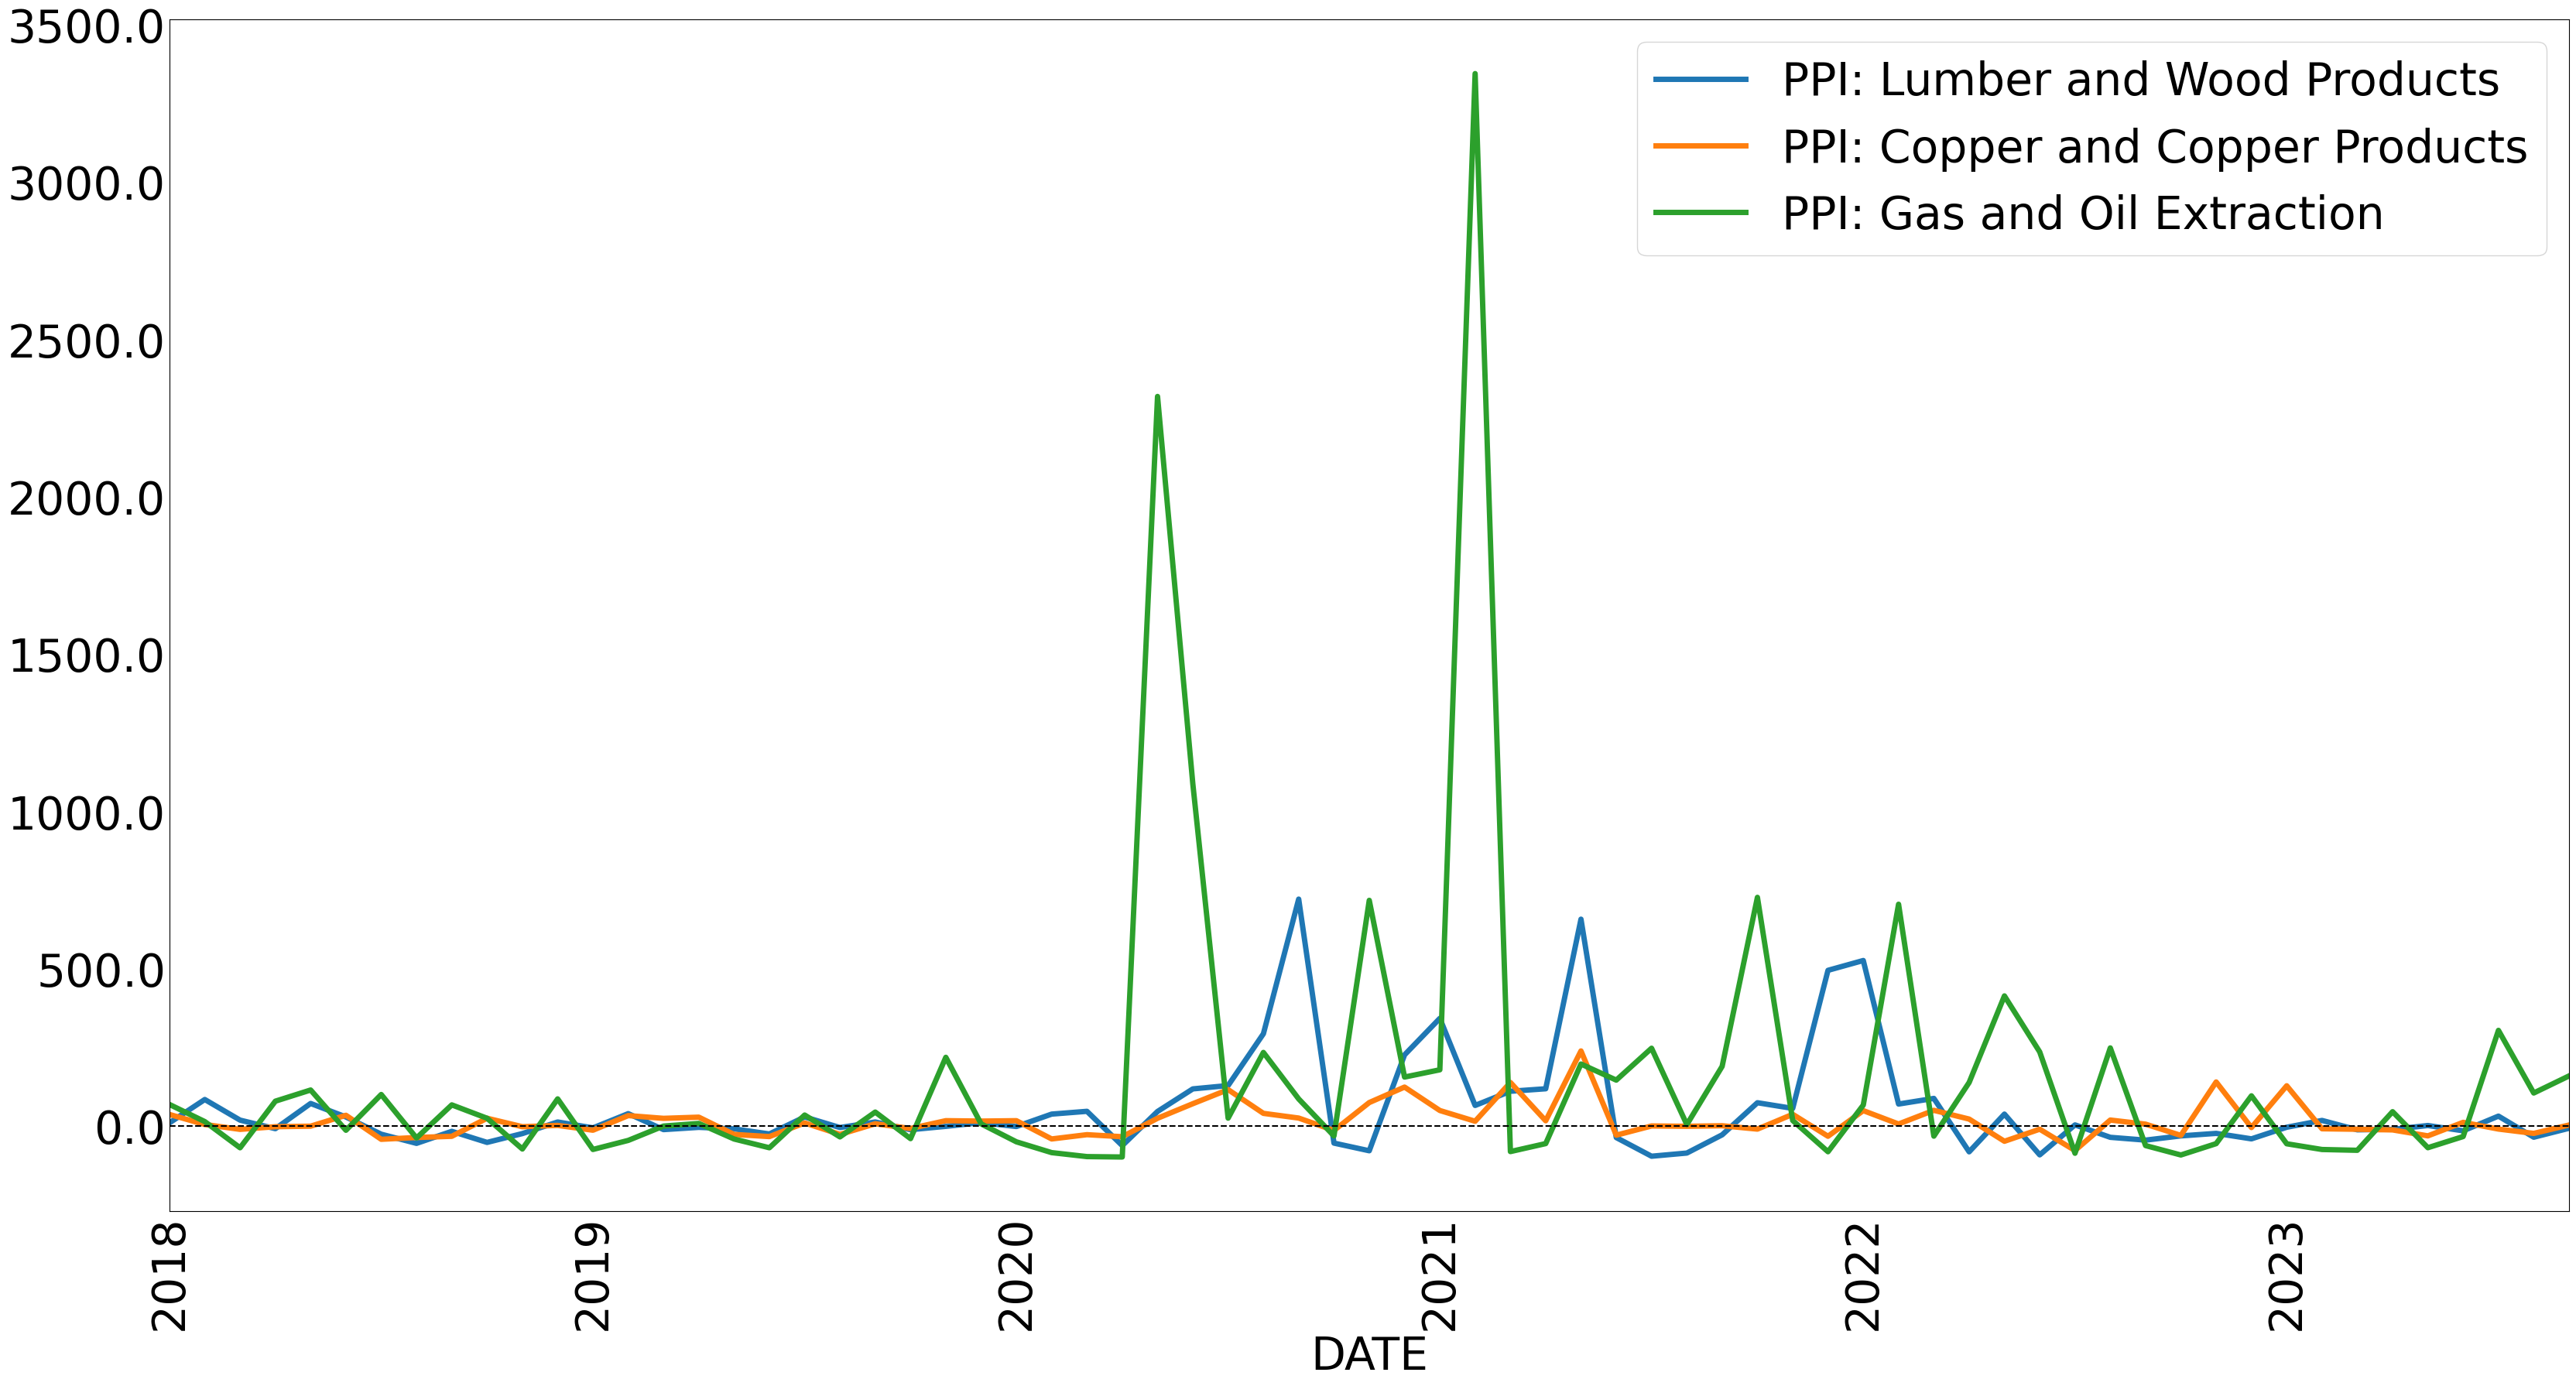

In [8]:
plot_df = monthly_rate[plot_keys]
plot_lines(plot_df.loc["2018":], linewidth = 5)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\968516835.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)


Text(0.5, 1.0, 'Year-Over-Year Inflation')

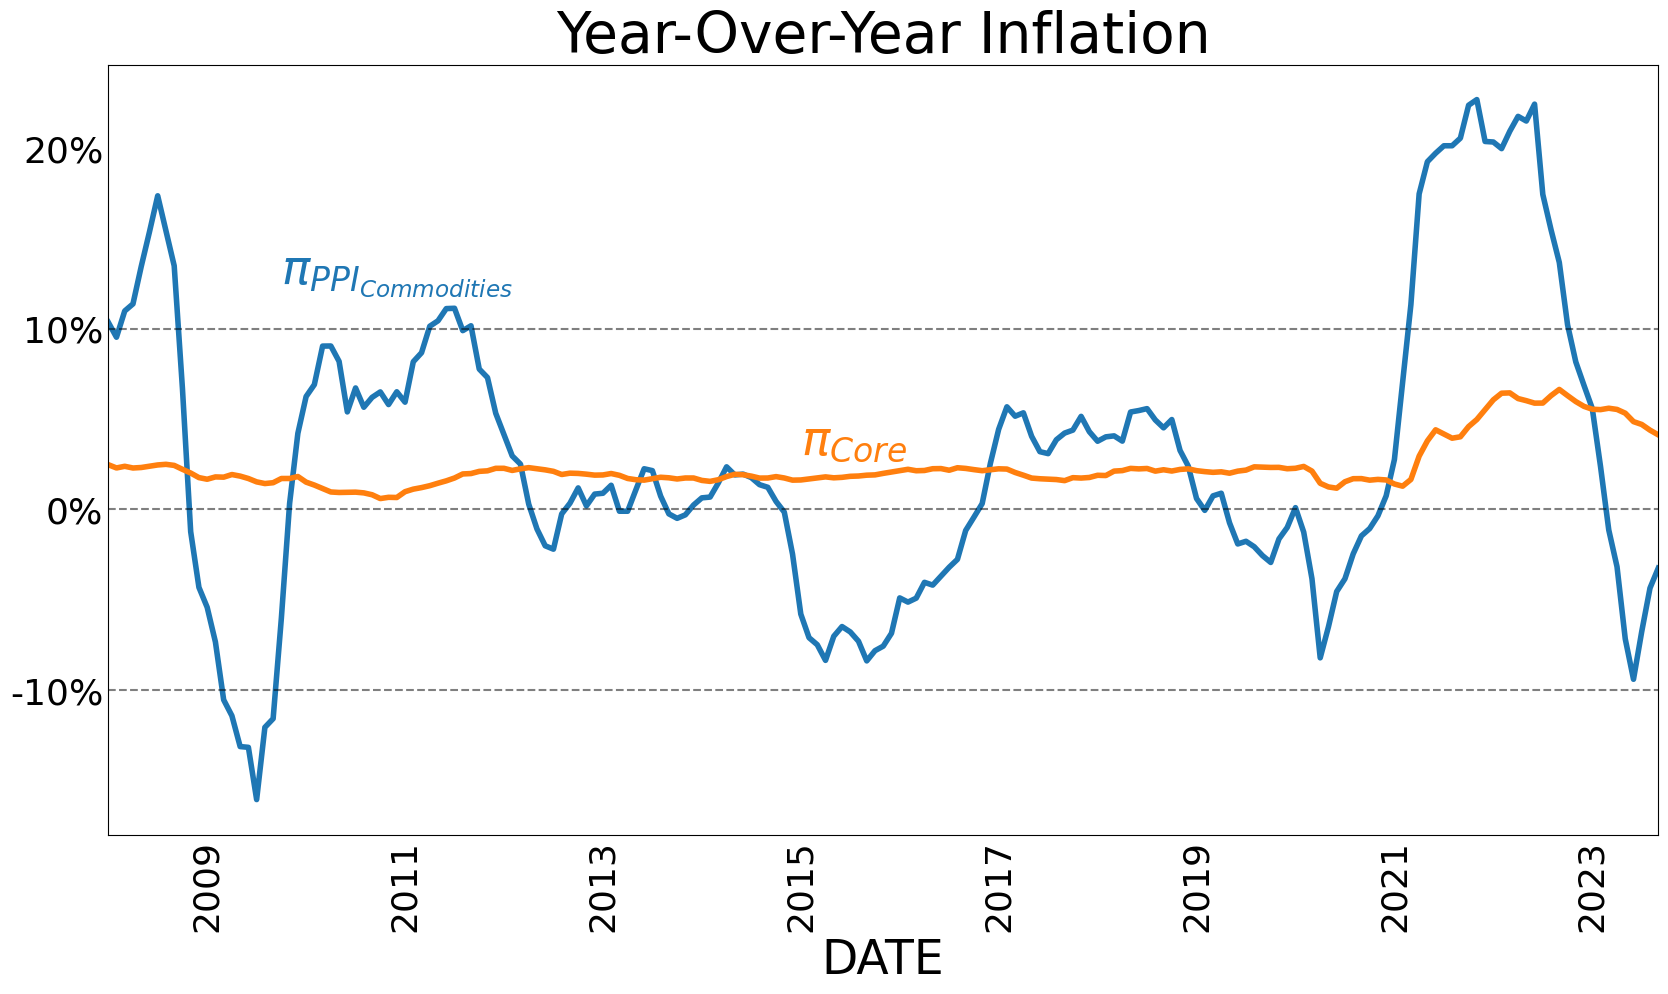

In [9]:
plt.rcParams.update({'font.size': 34})
plot_keys = ["$\pi_{PPI_{Commodities}}$", 
             "$\pi_{Core}$"]
plot_df = annual_rate[plot_keys].loc["2008":]#.dropna()
fig,ax = plt.subplots(figsize=(20,10))
plot_df.plot(ax = ax, linewidth = 4, legend = False)
ax.axhline(0, ls = "--", color = "k", alpha = .5)
ax.axhline(-10, ls = "--", color = "k", alpha = .5)
ax.axhline(10, ls = "--", color = "k", alpha = .5)
ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.text("2009-10",12.5 ,  plot_keys[0], color = "C0", alpha = 1)
ax.text("2015",3 ,  plot_keys[1], color = "C1", alpha = 1)
ax.set_title("Year-Over-Year Inflation")
# plot_lines(plot_df, linewidth = 5)

#plot_df.to_csv("inflationData.csv")

In [10]:
plot_df = annual_rate[plot_keys].dropna().loc["2000":]


C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\2258984167.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)


,$\pi_{PPI_{Commodities}}$,$\pi_{Core}$
$\pi_{PPI_{Commodities}}$,1.000000,0.330094
$\pi_{Core}$,0.330094,1.000000


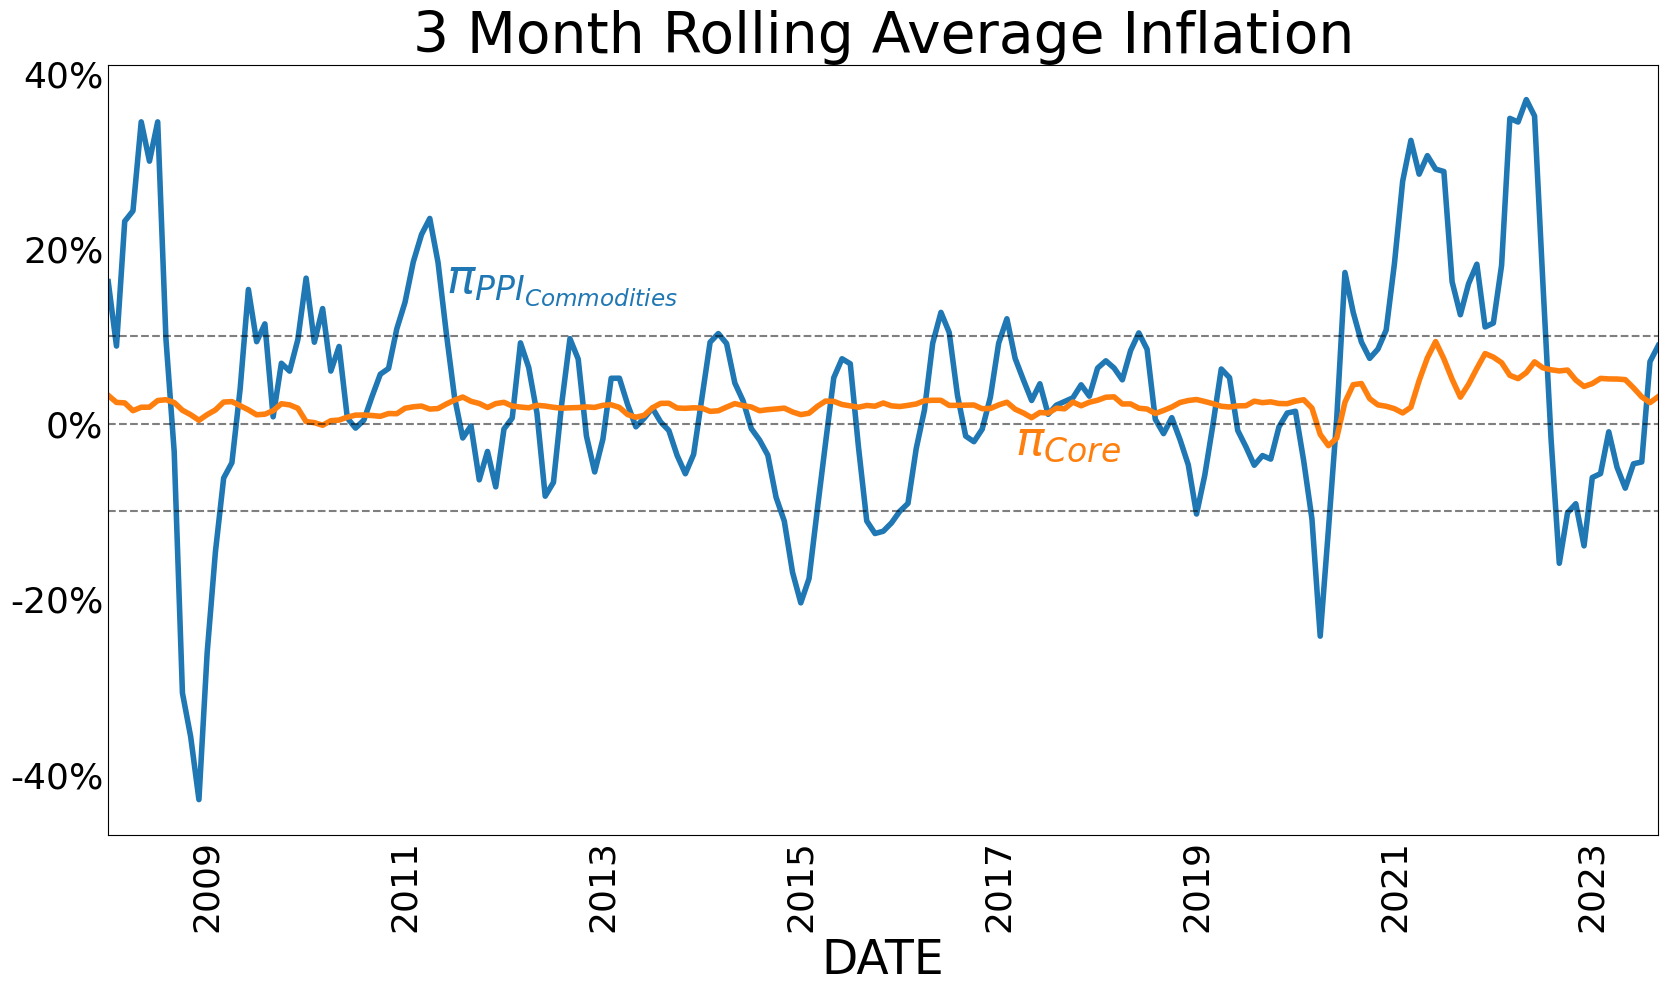

In [11]:
plt.rcParams.update({'font.size': 34})
plot_keys = ["$\pi_{PPI_{Commodities}}$", 
             "$\pi_{Core}$"]
months = 3
plot_df = monthly_rate[plot_keys].rolling(months).mean().loc["2008":].dropna()
fig,ax = plt.subplots(figsize=(20,10))
plot_df.plot(ax = ax, linewidth = 4, legend = False)
ax.axhline(0, ls = "--", color = "k", alpha = .5)
ax.axhline(-10, ls = "--", color = "k", alpha = .5)
ax.axhline(10, ls = "--", color = "k", alpha = .5)
ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.text("2011-06",15 ,  plot_keys[0], color = "C0", alpha = 1)
ax.text("2017-03",-3.5,  plot_keys[1], color = "C1", alpha = 1)
ax.set_title(str(months) + " Month Rolling Average Inflation")
plot_df.corr()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\3519058018.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)


,$\pi_{Core}$
$\pi_{Core}$,1.0


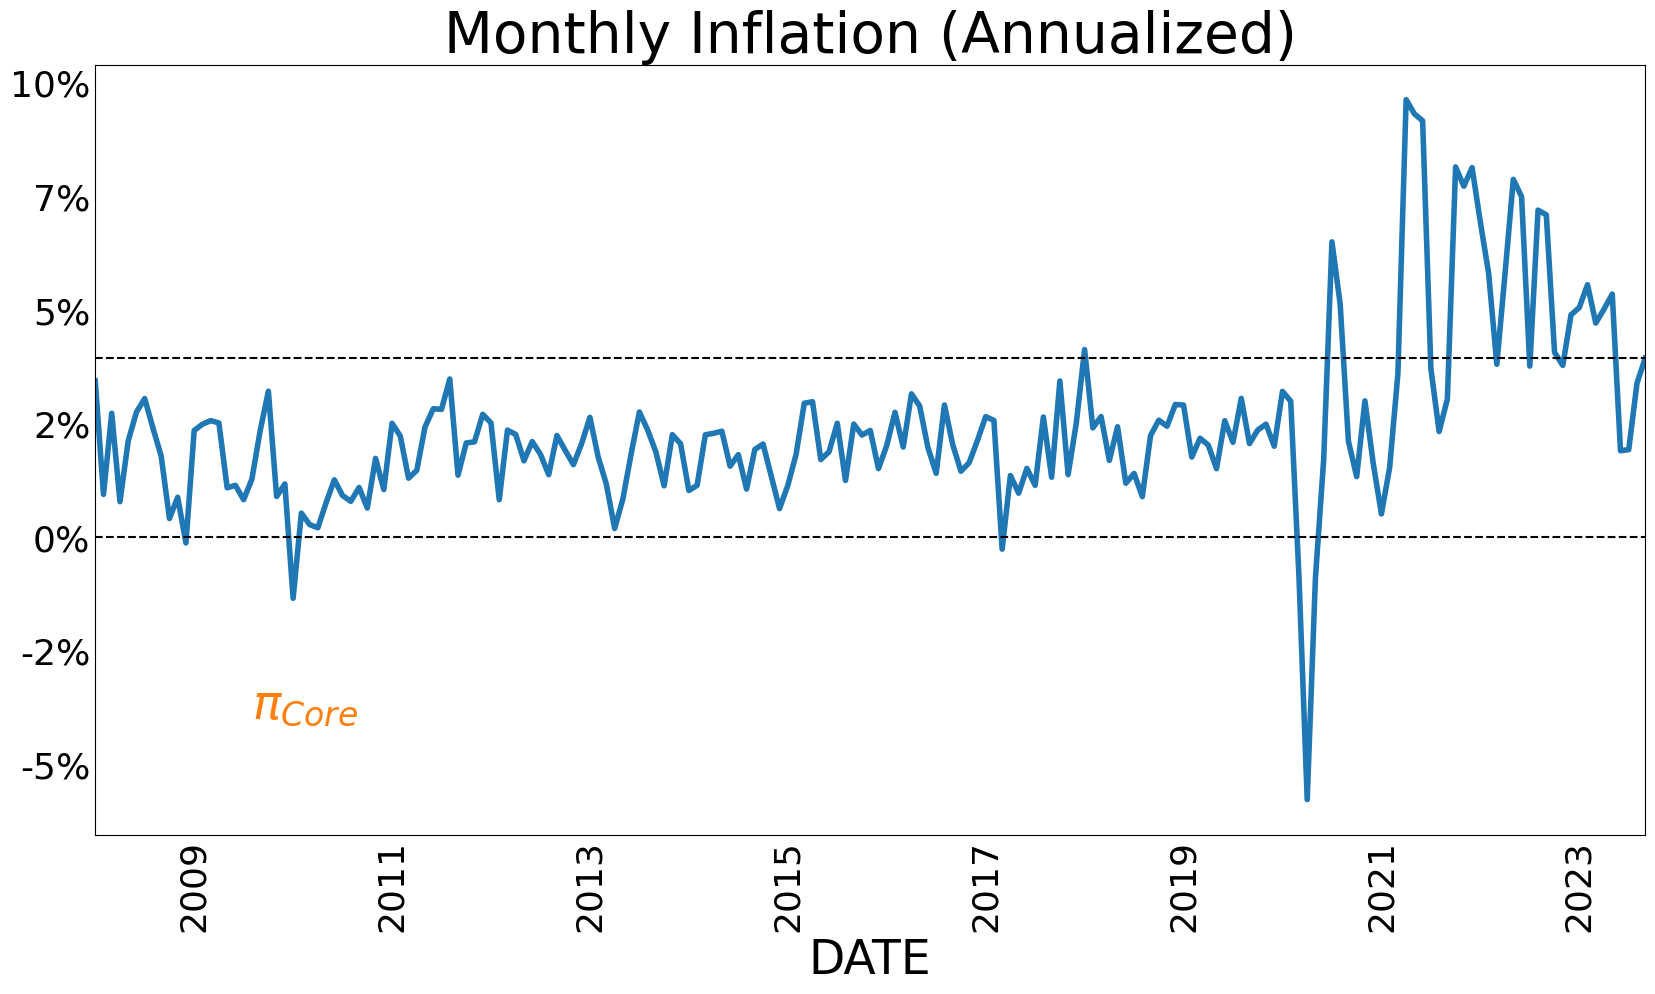

In [12]:
plt.rcParams.update({'font.size': 34})
plot_keys = ["$\pi_{Core}$"]
plot_df = monthly_rate[plot_keys].rolling(1).mean().dropna().loc["2008":]
fig,ax = plt.subplots(figsize=(20,10))
plot_df.plot(ax = ax, linewidth = 4, legend = False)
ax.axhline(0, ls = "--", color = "k")
ax.axhline(plot_df[plot_keys[0]][-1], ls = "--", color = "k")

ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
# ax.text(465,26 ,  plot_keys[0], color = "C0", alpha = 1)
ax.text("2009-08-30",-4 ,  plot_keys[0], color = "C1", alpha = 1)
ax.set_title("Monthly Inflation (Annualized)")
plot_df.corr()

In [13]:
plot_df[plot_keys[0]][-12:]

DATE
2022-10-31    4.072221
2022-11-30    3.784367
2022-12-31    4.898485
2023-01-31    5.057521
2023-02-28    5.560006
2023-03-31    4.716339
2023-04-30    5.022262
2023-05-31    5.353998
2023-06-30    1.907161
2023-07-31    1.931859
2023-08-31    3.393626
2023-09-30    3.944781
Freq: M, Name: $\pi_{Core}$, dtype: float64

C:\Users\JLCat\AppData\Local\Temp\ipykernel_42864\1650181770.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([val * 100 / 1000 for val in ax.get_yticks()], fontsize = 26)


Text(0.5, 1.0, 'Real Business Inventories')

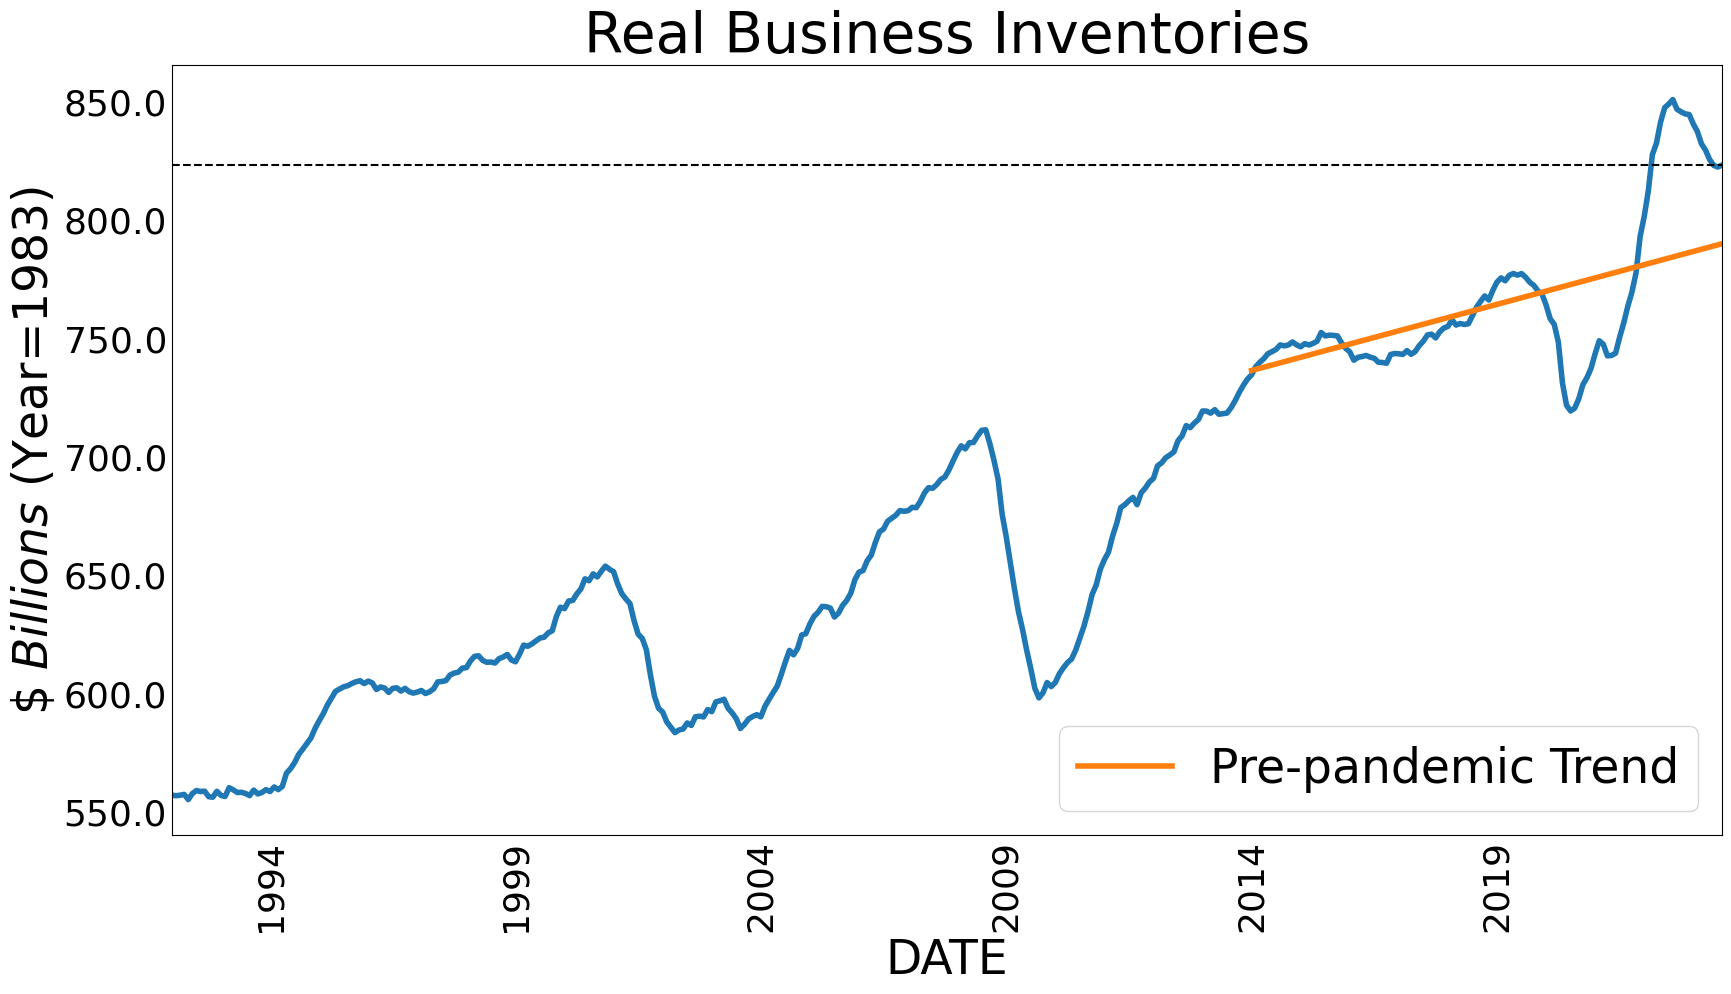

In [14]:
import statsmodels.api as sm
plt.rcParams.update({'font.size': 34})
plot_keys = ["Real Business Inventories"]
plot_df = df[plot_keys].dropna()#.loc["2008":]

fig,ax = plt.subplots(figsize=(20,10))
plot_df.plot(ax = ax, linewidth = 4, legend = False)
plot_df["Time"] = np.arange(len(plot_df))
y = plot_df[plot_keys].loc["2014":"2019"]
X = plot_df[["Time"]].loc["2014":"2019"]
X["Constant"] = 1
reg = sm.OLS(y, X)
results = reg.fit()
# plot_df["Trend"] = 
print()
X_new = plot_df[["Time"]].loc["2014":]
X_new["Intercept"] = 1
X_new["Pre-pandemic Trend"] = results.predict(X_new)
# = results.fittedvalues
X_new["Pre-pandemic Trend"].plot(ax = ax, linewidth = 4, legend = True)

ax.axhline(plot_df.iloc[-1]["Real Business Inventories"], ls = "--", color = "k")
ax.set_yticklabels([val * 100 / 1000 for val in ax.get_yticks()], fontsize = 26)
ax.set_ylabel("$\$$ $Billions$ (Year=1983)")
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.set_title("Real Business Inventories")
# ax.text(460,18 ,  plot_keys[0], color = "C0", alpha = 1)
# ax.text(532,3 ,  plot_keys[1], color = "C1", alpha = 1)


# plot_lines(plot_df, linewidth = 5)

#plot_df.to_csv("inflationData.csv")

In [15]:
df["$\pi_{Urban} - \pi_{e_{5Y}}$"] = df["$\pi_{Urban}$"].sub(df["$\pi_{e_{5Y}}$"])
df["$\pi_{Core} - \pi_{e_{10Y}}$"] = df["$\pi_{Core}$"].sub(df["$\pi_{e_{10Y}}$"])

KeyError: '$\\pi_{Urban}$'

In [ ]:
 plot_keys = ["$\pi_{Urban}$",
             "$\pi_{e_{5Y}}$",
            "$\pi_{Urban} - \pi_{e_{5Y}}$"]
plot_df = df[plot_keys].dropna()#.rolling(12).mean()
fig,ax = plt.subplots(figsize=(20,10))
plot_df[plot_keys[:2]].plot(ax = ax, linewidth = 4, legend = False)
plot_df[plot_keys[2]].plot(ax = ax, linewidth = 4, color = "k", ls="-", alpha = .5)
ax.axhline(0, ls = "--", color = "k")
ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()], fontsize = 26)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.text(597,3.4 ,  plot_keys[0], color = "C0", alpha = 1)
ax.text(513,2.5,  plot_keys[1], color = "C1", alpha = 1)
ax.text(503,-1.5 , plot_keys[2], color = "k", alpha = .65)

# plot_df#.to_csv("inflationData.csv")

In [ ]:
plot_keys = ["Personal Savings Rate"]
plot_df = df[plot_keys]#.rolling(12).mean()
plot_lines(plot_df, linewidth = 5)
# plot_df#.to_csv("inflationData.csv")

In [ ]:
plot_keys=["$\pi_{Core}$",
           "$\pi_{e_{5Y}}$"]
plot_df = df[plot_keys]
plot_scatter(plot_df)

In [ ]:
plot_keys = ["$\pi_{PPI}$",
             "Industrial Production Index Annual % Change"]
plot_df = df[plot_keys]
fig,ax = plt.subplots(figsize=(20,10))

plot_df[plot_keys].dropna().plot.line(linewidth = 4, 
                           legend = False,
                          ax = ax,
                          alpha = .8)
# ax2 =ax.twinx()
# plot_df[plot_keys[1]].dropna().plot.line(linewidth = 4, 
#                            legend = False,
#                           ax = ax2,
#                           alpha = .8, color = "C2")

ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])
# ax2.set_yticklabels([str(int(val)) + "%" for val in ax2.get_yticks()])

ax.axhline(0,ls="--", linewidth = 2, color = "k")
ax.text(457,18,"PPI", color = "C0")
ax.text(480,-10,"Industrial Production".replace(" ","\n"), color = "C1")
# ax.text(593,25,"M2", color = "C2")
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.set_ylabel("Annual Change")

In [ ]:
plot_keys = ["$\pi_{Core}$",
            "M2 Annual % Change"]
plot_df = df[plot_keys]
fig,ax = plt.subplots(figsize=(20,10))
plot_df[plot_keys[0]].dropna().plot.line(linewidth = 4, 
                           legend = False,
                          ax = ax,
                          alpha = .8)
ax2 =ax.twinx()
plot_df[plot_keys[1]].dropna().plot.line(linewidth = 4, 
                           legend = False,
                          ax = ax2,
                          alpha = .8, color = "C2")

ax.set_yticklabels([str(val) + "%" for val in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([str(val) + "%" for val in ax2.get_yticks()], color = "C2")
ax.text(585, 3.8, "$\Delta M_2$", color = "C2", fontsize= 34)
ax.text(275, 2.95, plot_keys[0], color = "C0", fontsize = 40)

plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
# ax.set_ylabel(plot_keys[0],fontsize = 40, color = "C0")
# ax2.set_ylabel("$\Delta$",fontsize = 40, color = "C2")

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
plot_keys = ["M2 Annual % Change", 
            "Personal Savings Rate"]
plot_df = df[plot_keys].loc["2005":]
plot_df.plot.line(linewidth = 5, 
                  legend = False, 
                 ax = ax, color = ["C2","C1"])
ax.text(475, 10,"$\Delta M_2$", color = "C2", ha = "center", fontsize = 34)
ax.text(599, 25, plot_keys[1].replace(" ","\n"), color = "C1", ha = "right")
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
# ax.set_ylim(0)
ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])

plot_df.to_csv("M2RateData.csv")

In [ ]:
 plot_keys = ["Private Weekly Employee Earnings",
"Private Hourly Nonsupervisory Earnings"]
plot_df = df[plot_keys].dropna()#.rolling(12).mean()
fig,ax = plt.subplots(figsize=(20,10))
ax2 =ax.twinx()
plot_df[plot_keys[0]].plot(ax = ax, linewidth = 4, legend = False)
plot_df[plot_keys[1]].plot(ax = ax2, linewidth = 4, color = "C1", ls="-", alpha = .5)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
# ax.text(597,3.4 ,  plot_keys[0], color = "C0", alpha = 1)
# ax.text(513,2.4,  plot_keys[1], color = "C1", alpha = 1)

# plot_df#.to_csv("inflationData.csv")


In [ ]:
plot_keys = ["Private Hourly Nonsupervisory Earnings Annual % Change",
              "$\pi_{Urban}$"
             ]
plot_df = df[plot_keys].dropna()#.rolling(12).mean()
fig,ax = plt.subplots(figsize=(20,10))
# ax2 =ax.twinx()
plot_df[plot_keys].plot(ax = ax, linewidth = 4, legend = False)
# plot_df[plot_keys[1]].plot(ax = ax2, linewidth = 4, color = "C1", ls="-", alpha = .5)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.text(322,4.6 ,  "Private\nWeekly\nEmployee\nEarnings", color = "C0", alpha = 1, fontsize = 24)
ax.text(468,4.8,  "$CPI_{Urban}$", color = "C1", alpha = 1)
ax.set_ylabel("Annual Change")
vals = ax.get_yticks()
ax.set_yticklabels([str(int(y)) + "%" for y in vals]) 

plot_df.to_csv("PrivateEarningsAndCPIUrbanAnnualPercentChange.csv")


In [ ]:
 plot_keys = ["Real Private Weekly Employee Earnings Annual % Change",
            "Real Private Hourly Nonsupervisory Earnings Annual % Change",
             "$\pi_{Urban}$"]
plot_df = df.loc["2020":,plot_keys].dropna()#.rolling(12).mean()
fig,ax = plt.subplots(figsize=(20,10))
# ax2 =ax.twinx()
plot_df[plot_keys].plot(ax = ax, linewidth = 4, legend = False)
# plot_df[plot_keys[1]].plot(ax = ax2, linewidth = 4, color = "C1", ls="-", alpha = .5)
plt.xticks(rotation=90, fontsize =26)
ax.tick_params('both', length=0, which='both')
ax.text(608,5 ,  plot_keys[0].replace(" Annual % Change", "").replace(" ","\n"), color = "C0", fontsize = 24, alpha = 1)
ax.text(603.8,1.8,  plot_keys[1].replace(" Annual % Change", "").replace(" ","\n"), color = "C1", fontsize = 24, alpha = 1)
ax.text(618,5.7,  "$CPI_{Urban}$", color = "C2", fontsize = 30, alpha = 1)

ax.axhline(0, ls = "--", color = "k")
ax.set_ylabel("Annual Change")
vals = ax.get_yticks()
ax.set_yticklabels([str(int(y)) + "%" for y in vals]) 

plot_df.to_csv("PrivateEarningsAndCPIUrbanAnnualPercentChangeSinceJan2020.csv")


In [ ]:
df["Unemployment Rate Annual Change"] = df["Unemployment Rate"].diff(12)
df["$\pi_{Urban}$ Annual Change"] = df["$\pi_{Urban}$"].diff(12)
keys = ["Real Private Weekly Employee Earnings Annual % Change",
            "Real Private Hourly Nonsupervisory Earnings Annual % Change",
             "$\pi_{Urban}$ Annual Change",
             "Unemployment Rate Annual Change"]

fig,ax = plt.subplots(figsize=(20,10))
plot_df = df[keys]
plot_df.rename(
    columns = {
        "Real Private Weekly Employee Earnings Annual % Change":"Real Private Weekly Earnings\nAnnual % Change",
        "$\pi_{Urban}$ Annual Change":"$\pi_{Urban}$\nAnnual Change",
        "Unemployment Rate Annual Change": "Unemployment Rate\nAnnual Change"})\
    .plot.scatter(x= "$\pi_{Urban}$\nAnnual Change", 
                  c = "Unemployment Rate\nAnnual Change", 
                  y="Real Private Weekly Earnings\nAnnual % Change",
                  ax = ax,
                  cmap = "viridis_r")


In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
plot_df.rename(columns = {"Real Private Weekly Employee Earnings Annual % Change":"Real Private\nWeekly Earnings",
                         "Unemployment Rate":"% Unemployed"}).plot.scatter(
    x= "$\pi_{Urban}$", 
                c = "% Unemployed", 
                y="Real Private\nWeekly Earnings",
               ax = ax,
               cmap = "viridis")